# Automatic Mesh Generation Using Delaunay Refinement

## Delaunay Triangulation

Delaunay triangulations were first studied by Boris Delaunay in the 1930s. Theoretically, it's the dual graph of the Voronoi diagram constructed by joining the nodes across neighbours. Practically speaking, it's the connectivitiy of a given set of points where every triangle is such that each circumcircle contains no point other than those of the circumcircle's own triangle. An useful property of these connectivities is that the minimum angle across the triangulation is the maximum it can be in any configuration.

<img src="./plots/fig1.png">
The one on the left is Delaunay, whereas the one on the right not. As can be seen clearly, the minimum angle in the configuration on the right is larger than the other one.

## Constrained Delaunay Triangulation

Constrained Delaunay triangulations are Delaunay triangulations with the additional constraint of having to respect certain 'un-crossable' segments, i.e. no matter what these segments must also be valid edges of the final triangulation. These are valuable in cases where it is mandatory to respect certain constriants, such as roads on a terrain map.

<img src="./plots/CDT.png">
In the figure above, the one the left is the Delaunay triangulation with the 'locked' segments marked in red. Clearly these have not been respected. The figure on the right is the Constrained Delaunay triangulation and as can be seen the locked segments are present in the final triangulation.

## Delaunay Refinement

So how does one turn this seemingly mundane graph into a useful tool to generate high quality meshes from minimal connectivity information? Use the circumcenter property! The actual algorithm is a bit complicated, but the gist of it is that whenever you encounter a badly shaped triangle, simply split it by inserting its circumcenter into the triangulation whilst maintaining the Delaunay property. This simple heuristic leads to a very effective meshing algorithm that adapts the element size according to the input geometry. With a few tweaks, one can also impose additional definitions of 'goodness' of a triangle, failing to meet which a triangle can be split. This ensures that elements in the final mesh are nicely shaped and placed, without the designer having to specify anything more than a valid input Planar Straight Line Graph (PSLG).

<img src="./plots/fig3.png">
The figure above demonstrates the initial and final results of Delaunay refinement.

## Mesh Generation In Action

The code below uses an algorithm called 'The Terminator', presented first by Jonathan Shewchuk back in 2002. It is a comprehensive mesh generator that can produce good meshes on most geometries for minimum angles as high as 28 degrees, although this is can be different for certain input PSLGs with small angles. In the snippet below it triangulates a simple Eppler high lift airfoil. As can be seen, areas closer to the leading and trailing edges that require a higher resolution to be captured effectively do indeed have a higher concentration of elements. The size of the elements decreases as we move farther away from the airfoil and the resolution requirements drop.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from terminator.terminator import Terminator as tm
from terminator.CDT.DT.data import make_data
%matplotlib notebook

In [2]:
points, segments = make_data()
insertion_points = np.array([[0.1, 0.05]])

<IPython.core.display.Javascript object>


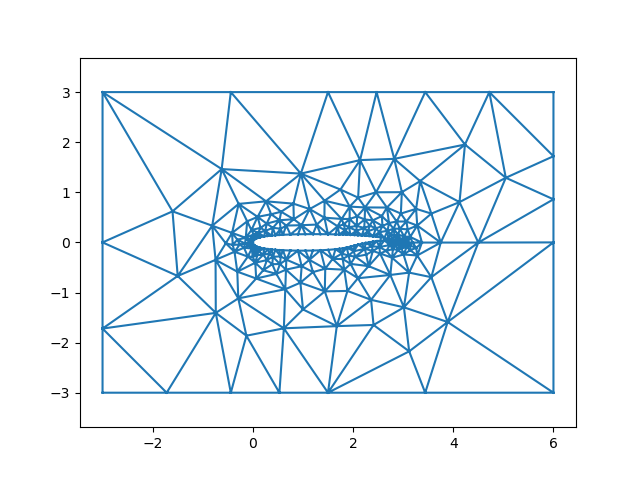

In [5]:
tri_ = tm(points, segments, insertion_points, min_angle=25.0)
points_plot, vertices = tri_.export_tri()
plt.triplot(points_plot[:, 0], points_plot[:, 1], vertices)
plt.axis('equal')
plt.show()

### Notes

There are still some kinks that need sorting out, which is why the last cell might run into an error upon execution. If this happens, simply re-run the cell, since this is a randomized algorithm a re-run garuntees that a differnt configuration will be used which generally solves the problem.

If the cell doesn't stop execution, lower the `min_angle` constraint.